In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import load_iris

import warnings
warnings.filterwarnings("ignore")

# Классификация

### Прогнозирование пола спортсмена __Логистической регрессией__

In [110]:
# DataSet - https://www.kaggle.com/rio2016/olympic-games
sportsmen_df = pd.read_csv('https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/athletes.csv')
sportsmen_df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [111]:
sport_categorical_list = list(set(sportsmen_df["sport"]))
sport_categorical_list

['aquatics',
 'football',
 'handball',
 'judo',
 'taekwondo',
 'equestrian',
 'badminton',
 'basketball',
 'cycling',
 'fencing',
 'hockey',
 'rowing',
 'sailing',
 'rugby sevens',
 'boxing',
 'shooting',
 'modern pentathlon',
 'table tennis',
 'athletics',
 'volleyball',
 'canoe',
 'weightlifting',
 'tennis',
 'gymnastics',
 'wrestling',
 'golf',
 'archery',
 'triathlon']

In [112]:
# Определение признаков и целевой переменной, токенизация категорий
X = pd.get_dummies(sportsmen_df.loc[:, ["sport", "height", "weight"]])
y = sportsmen_df["sex"]
X.head()

,height,weight,sport_aquatics,sport_archery,sport_athletics,sport_badminton,sport_basketball,sport_boxing,sport_canoe,sport_cycling,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,1.72,64.0,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1.68,56.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1.98,79.0,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1.83,80.0,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,1.81,71.0,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [113]:
X.isna().sum()

height                     330
weight                     659
sport_aquatics               0
sport_archery                0
sport_athletics              0
sport_badminton              0
sport_basketball             0
sport_boxing                 0
sport_canoe                  0
sport_cycling                0
sport_equestrian             0
sport_fencing                0
sport_football               0
sport_golf                   0
sport_gymnastics             0
sport_handball               0
sport_hockey                 0
sport_judo                   0
sport_modern pentathlon      0
sport_rowing                 0
sport_rugby sevens           0
sport_sailing                0
sport_shooting               0
sport_table tennis           0
sport_taekwondo              0
sport_tennis                 0
sport_triathlon              0
sport_volleyball             0
sport_weightlifting          0
sport_wrestling              0
dtype: int64

In [114]:
# Очистка NaN-ов
sportsmen_df = sportsmen_df[~(sportsmen_df['height'].isna())]
sportsmen_df = sportsmen_df[~(sportsmen_df['weight'].isna())]

X = pd.get_dummies(sportsmen_df.loc[:, ["sport", "height", "weight"]])
y = sportsmen_df["sex"]

In [115]:
X.isna().sum()

height                     0
weight                     0
sport_aquatics             0
sport_archery              0
sport_athletics            0
sport_badminton            0
sport_basketball           0
sport_canoe                0
sport_cycling              0
sport_equestrian           0
sport_fencing              0
sport_football             0
sport_golf                 0
sport_gymnastics           0
sport_handball             0
sport_hockey               0
sport_judo                 0
sport_modern pentathlon    0
sport_rowing               0
sport_rugby sevens         0
sport_sailing              0
sport_shooting             0
sport_table tennis         0
sport_taekwondo            0
sport_tennis               0
sport_triathlon            0
sport_volleyball           0
sport_weightlifting        0
sport_wrestling            0
dtype: int64

In [116]:
# Разбиение данных на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.head(3)

,height,weight,sport_aquatics,sport_archery,sport_athletics,sport_badminton,sport_basketball,sport_canoe,sport_cycling,sport_equestrian,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
11172,1.65,66.0,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4999,1.98,125.0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
273,1.99,88.0,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [117]:
# Построение пайплайна и обучение модели модели
model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [118]:
# Проверка работы модели
predict = model.predict(X_test)
score = model.predict_proba(X_test)
predict[:3], score[:3]

(array(['male', 'male', 'female'], dtype=object),
 array([[0.28244375, 0.71755625],
        [0.06335388, 0.93664612],
        [0.79376168, 0.20623832]]))

In [119]:
# Валидация качества
model.score(X_test, y_test)

0.8130755064456722

### Метод опорных векторов. __SVM__.

In [123]:
svc_model = make_pipeline(
    StandardScaler(),
    SVC(kernel="rbf")
)
svc_model

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [125]:
svc_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [126]:
# Оценка качества
train_score = model.score(X_train, y_train) 
test_score = model.score(X_test, y_test) 
train_score, test_score

(0.8160526315789474, 0.8130755064456722)

### Задача разделения __ирисов Фишера__

In [215]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [216]:
iris.target_names 

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [219]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [222]:
iris_df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
iris_df["target"] = iris["target"]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [225]:
X = iris_df[["sepal length (cm)", "sepal width (cm)"]] # забираем данные из датасета
Y = iris_df["target"]

model = LogisticRegression()
model2 = SVC()

model.fit(X, Y)
model2.fit(X, Y)
X.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [226]:
model.score(X, Y)

0.82

In [227]:
model2.score(X, Y)

0.82

In [228]:
# Разбиение данных на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.head()

,sepal length (cm),sepal width (cm)
81,5.5,2.4
133,6.3,2.8
137,6.4,3.1
75,6.6,3.0
109,7.2,3.6


In [229]:
# Проверка гипотезы: улучшится ли прогноз при стандартизации данных в этом датасете?
model_s = make_pipeline(
    StandardScaler(),
    SVC()
).fit(X_train, y_train)

model = SVC().fit(X_train, y_train)

model_s.score(X_test, y_test), model.score(X_test, y_test)

(0.7333333333333333, 0.8)

In [231]:
x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5

h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(),yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8,8))
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)

plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks()
plt.show()

InvalidIndexError: (slice(None, None, None), 0)

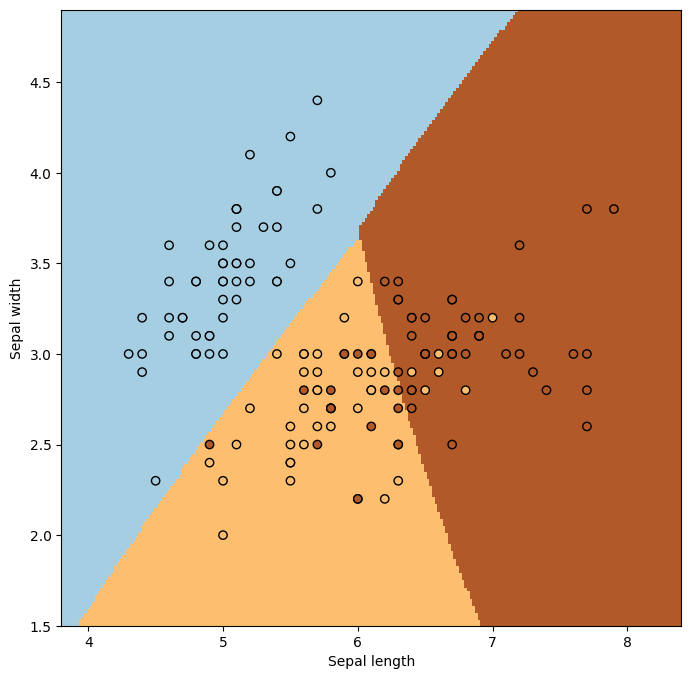

In [194]:
Z = model2.predict(np.c_[xx.ravel(),yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8,8))
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)

plt.scatter(X[:,0], X[:,1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks()
plt.show()

In [196]:
model2 = SVC(kernel='poly', degree=7)
model2.fit(X, Y)

SVC(degree=7, kernel='poly')

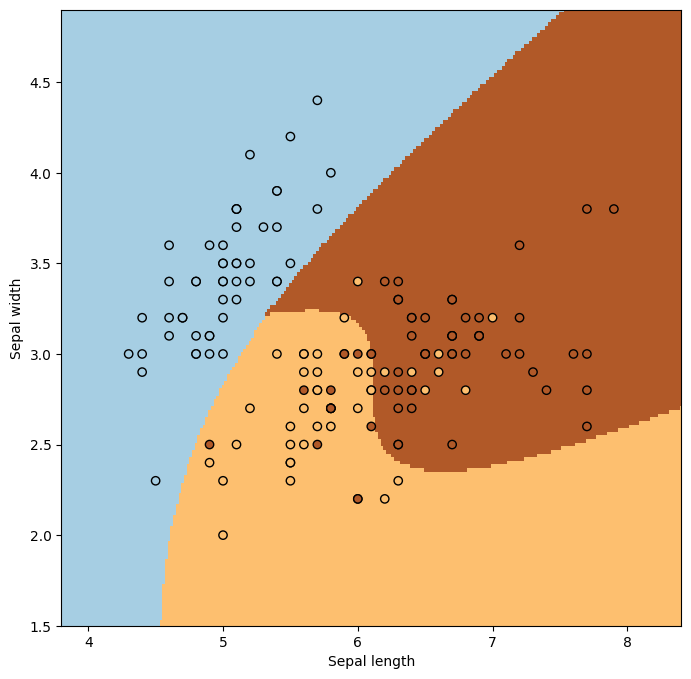

In [197]:
Z = model2.predict(np.c_[xx.ravel(),yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8,8))
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)

plt.scatter(X[:,0], X[:,1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks()
plt.show()